In [3]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

## Study of latency and bandwidth with UCX on THIN

In [4]:
raw_data = []

csv_files = glob.glob('*.csv')

for file in csv_files:

    df = pd.read_csv(file, skiprows=[1], header=0)

    raw_data.append(df)

data_temp = pd.concat(raw_data)

data = data_temp.groupby('Message_size', as_index=False).agg({
    'Avg_latency': 'mean',
    'Bandwidth': 'mean'
})

data['Time_comm'] = (data['Avg_latency'] / 10**6) + (data['Message_size'] / (data['Bandwidth']*10**6))

print(data)
#data.to_csv('data_latency_thin.csv', index=False)

    Message_size  Avg_latency     Bandwidth     Time_comm
0              1     0.282381     11.904286  3.663843e-07
1              2     0.280000     24.209048  3.626137e-07
2              4     0.279524     47.754762  3.632851e-07
3              8     0.279524     95.596667  3.632087e-07
4             16     0.279524    192.558095  3.626156e-07
5             32     0.370952    367.128095  4.581154e-07
6             64     0.362857    752.828095  4.478699e-07
7            128     0.599524    698.867143  7.826774e-07
8            256     0.656190   1343.221905  8.467770e-07
9            512     0.787143   2249.347619  1.014764e-06
10          1024     0.930000   3231.249524  1.246905e-06
11          2048     1.269048   4614.525714  1.712864e-06
12          4096     1.867619   5353.258095  2.632761e-06
13          8192     2.995238   6995.222381  4.166323e-06
14         16384     4.776667   5951.087619  7.529777e-06
15         32768     7.924286   6773.086190  1.276226e-05
16         655

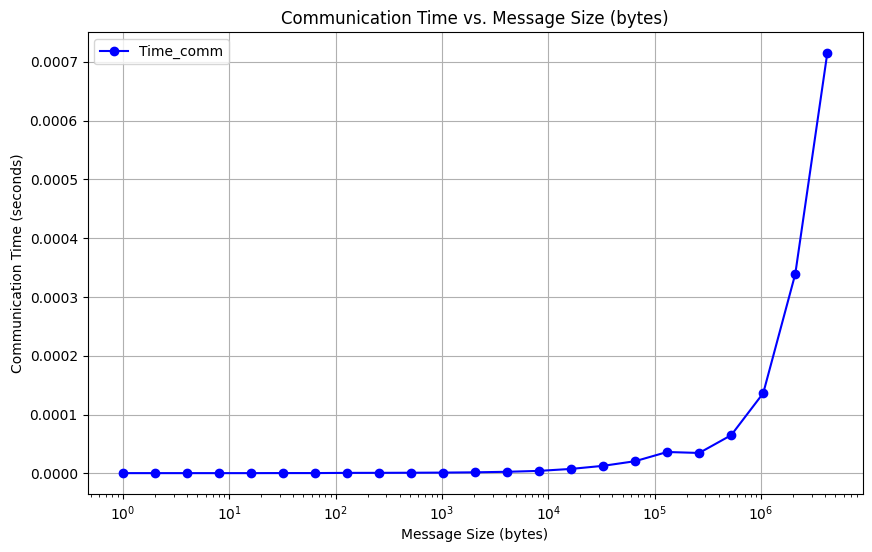

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(data['Message_size'], data['Time_comm'], marker='o', linestyle='-', color='b', label='Time_comm')
plt.xscale('log')
plt.xlabel('Message Size (bytes)')
plt.ylabel('Communication Time (seconds)')
plt.title('Communication Time vs. Message Size (bytes)')
plt.legend()
plt.grid(True)
plt.show()